##Ayush 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("dataset_model.csv",sep=",")



---
**1** :Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe

---







In [3]:
l=df.columns
for i in l:
  if(len(df[i].unique())==df.shape[0]):
    print(i)

Loan_ID


Hence `Loan_ID` is the field that provides unique information about the records.

In [0]:
new_df=df.drop(['Loan_ID'],axis=1)

In [5]:
print(new_df.head())
print("Shape of the dataframe is : ",new_df.shape)

  Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
0   Male      No          0  ...            1.0         Urban            Y
1   Male     Yes          1  ...            1.0         Rural            N
2   Male     Yes          0  ...            1.0         Urban            Y
3   Male     Yes          0  ...            1.0         Urban            Y
4   Male      No          0  ...            1.0         Urban            Y

[5 rows x 12 columns]
Shape of the dataframe is :  (614, 12)


In [6]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y




---
**2** Identifying Continous & Categorical Columns


---



In [7]:
for i in df:
  print(df[i].dtype,"\t",i)

object 	 Loan_ID
object 	 Gender
object 	 Married
object 	 Dependents
object 	 Education
object 	 Self_Employed
int64 	 ApplicantIncome
float64 	 CoapplicantIncome
float64 	 LoanAmount
float64 	 Loan_Amount_Term
float64 	 Credit_History
object 	 Property_Area
object 	 Loan_Status


In [8]:
continous_var=new_df._get_numeric_data().columns
print(continous_var)
# continous_var holds the continous variables as they contains numeric data
for i in continous_var:
  print(len(new_df[i].unique()),"\t",i)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
505 	 ApplicantIncome
287 	 CoapplicantIncome
204 	 LoanAmount
11 	 Loan_Amount_Term
3 	 Credit_History


In [9]:
# since Credit_History has less records than the 10% of the size of the total records 
# therefore it  is categorical variable
conti_var=[]
for i in continous_var:
  if(len(new_df[i].unique()) >= 6):
    conti_var.append(i)
print(conti_var)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [10]:
cate_var=list(set(new_df.columns) - set(conti_var))
cat_var=[]
for i in cate_var:
  cat_var.append(i)
  print(len(new_df[i].unique()),"\t",i)
# these are the categorical variables in the dataset

3 	 Property_Area
3 	 Married
3 	 Gender
3 	 Self_Employed
3 	 Credit_History
2 	 Education
5 	 Dependents
2 	 Loan_Status




---

**3** Performing Uni-variate Analysis with Plots.Record your Observations

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06632b6e48>,
      dtype=object)

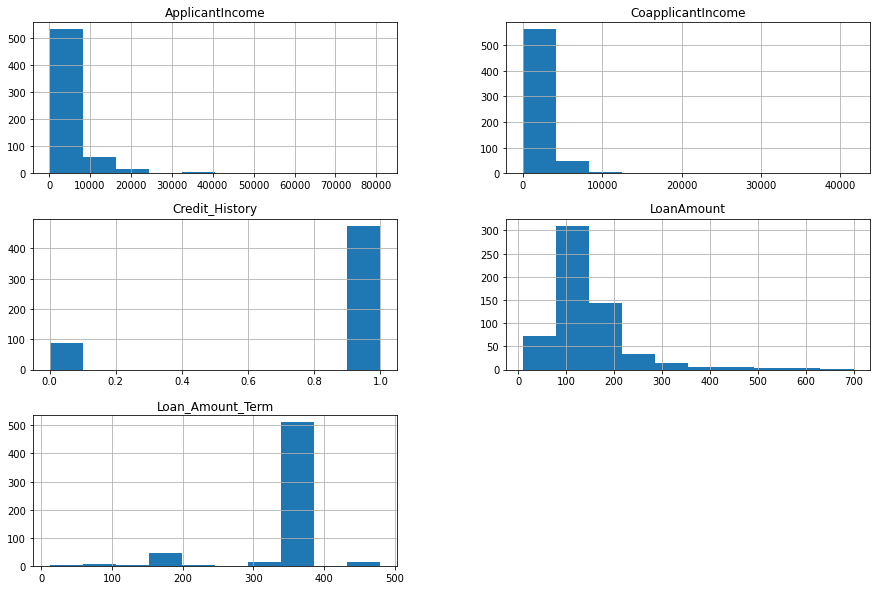

In [11]:
new_df.hist(figsize=[15,10])

*People choose the loan term in the range of 350 to 400.
*ApplicantIncome and Coapplicant income are approx similar to each orhet.

['Property_Area', 'Married', 'Gender', 'Self_Employed', 'Credit_History', 'Education', 'Dependents', 'Loan_Status']


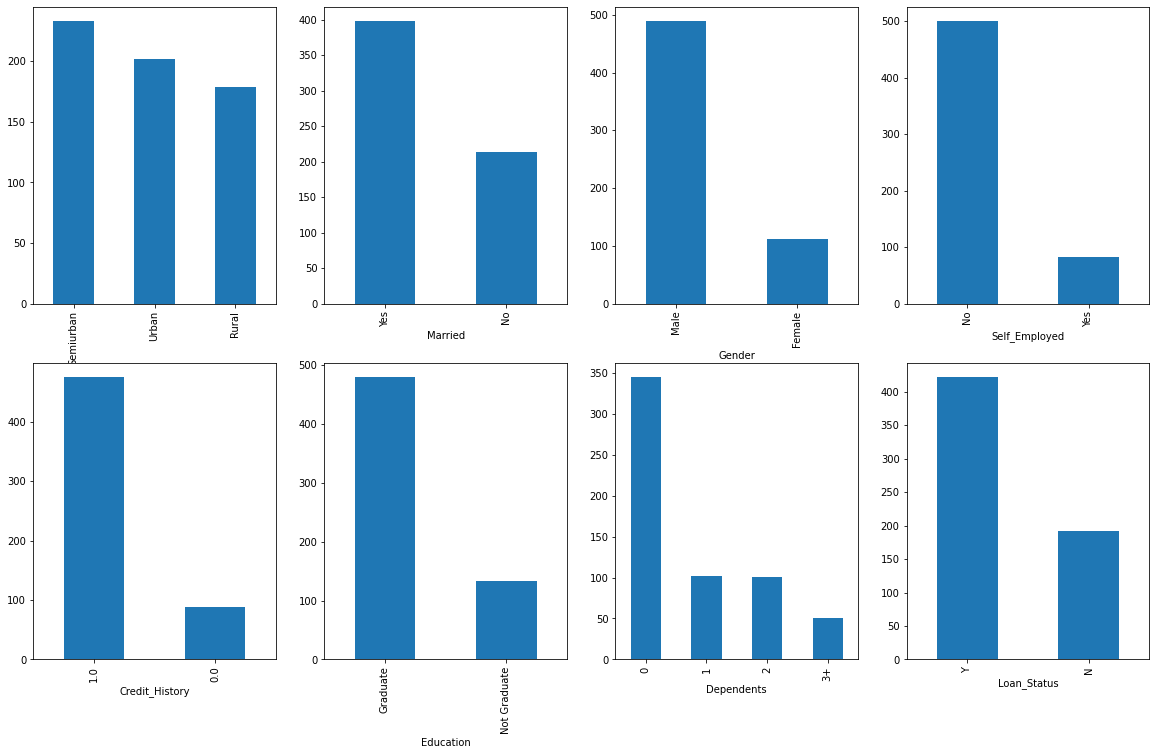

In [12]:
print(cate_var)
fig, axes = plt.subplots(2, 4)
cc=0
for i in range(2):
  for j in range(4):
    new_df[cate_var[cc]].value_counts().plot.bar(ax=axes[i,j],figsize=[20,12]).set_xlabel(cate_var[cc])
    cc+=1

* There are more males than females
* Most of the persons has credit history as 1 
* Two Third of the people were given the loan.
* The number of graduates are more than ungraduate which is good as the literate person will follow the rules and will invest the money for a good cause 



---

**4** Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

---



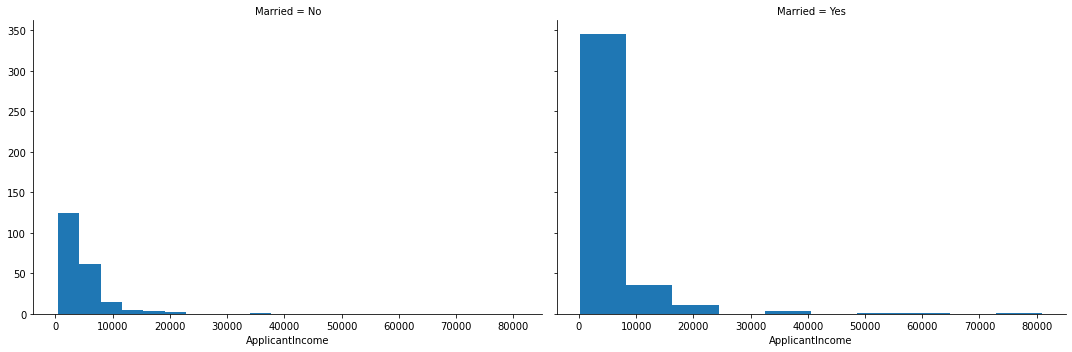

In [13]:
fn = sns.FacetGrid(new_df,col='Married',height=5, aspect=1.5)
fn = fn.map(plt.hist,"ApplicantIncome")

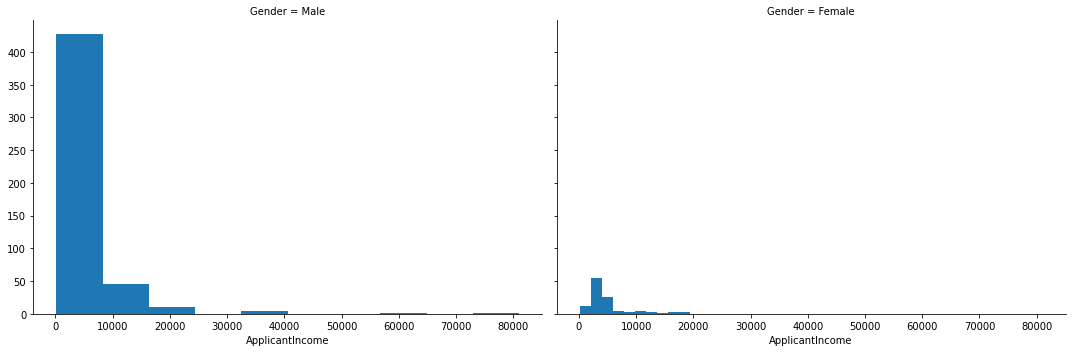

In [14]:
fn = sns.FacetGrid(new_df,col='Gender',height=5, aspect=1.5)
fn = fn.map(plt.hist,"ApplicantIncome")

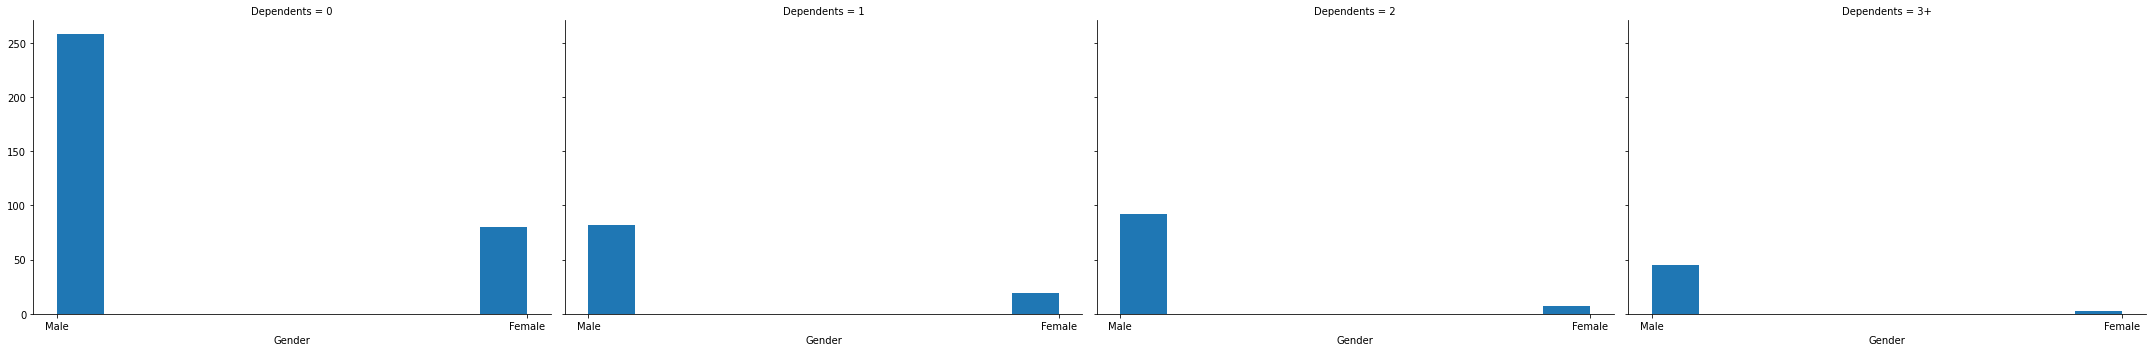

In [15]:
fn = sns.FacetGrid(new_df,col='Dependents',height=5, aspect=1.5)
fn = fn.map(plt.hist,"Gender")

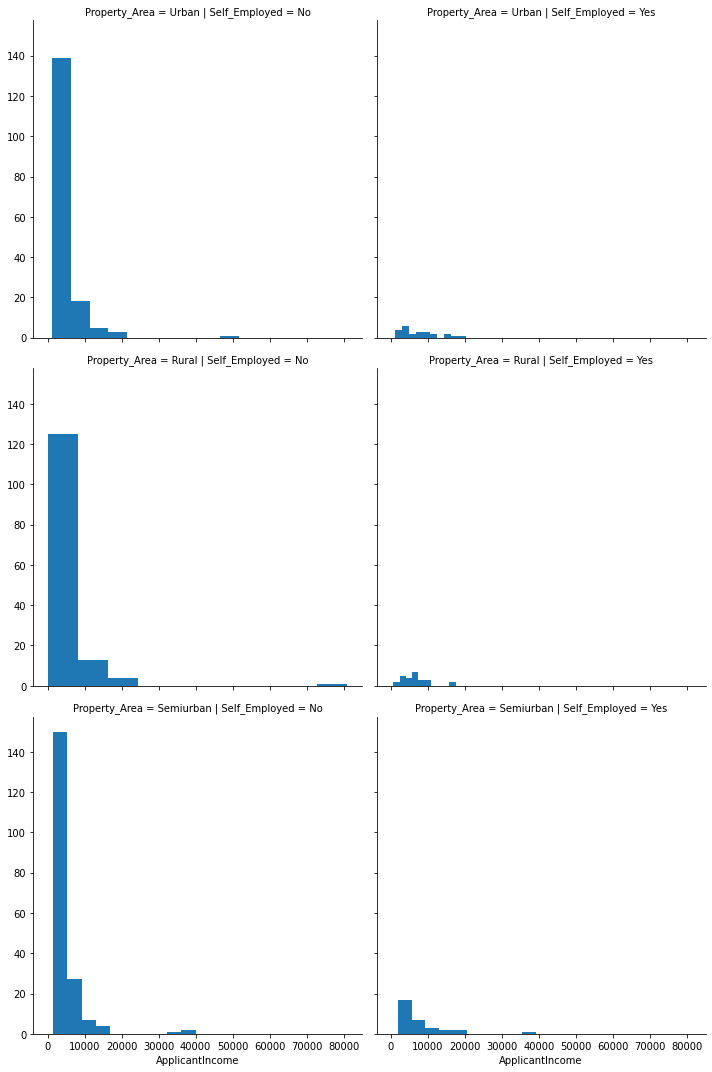

In [16]:
fn = sns.FacetGrid(df,col='Self_Employed',row='Property_Area',height=5, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")

* Married Person has income more than the one who are not married, ( married person has the family to care for so he/she has to earn more money)
* Males are much lagre in number but the avg income for both male and female is same
* Dependencies: Male whith 0 dependency are more than the females in the same. Moreover '0' has more males and females as compared to '1','2','3+'
* Regardless of the area is self employment is 'yes' then the applicant income is less. on the other hand if sely employment is 'no' then it is seen in the plot that the income is pretty good.
* Self Employemt is not much in the areas.



---
**5** Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc


---




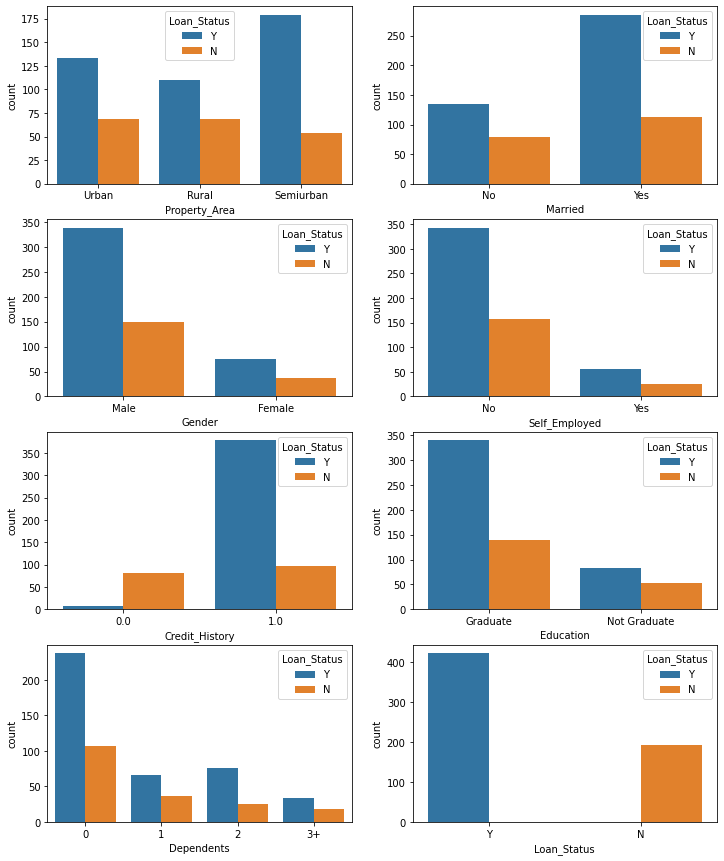

In [17]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat_col in enumerate(cate_var):
    row,col = i//2,i%2
    sns.countplot(x=cat_col,data=new_df,hue='Loan_Status',ax=axes[row,col])

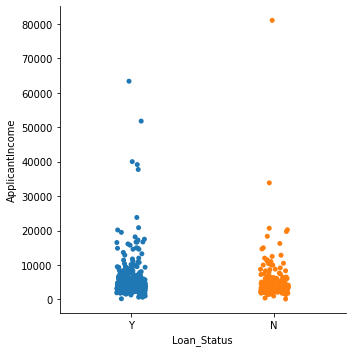

In [18]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',data=new_df)

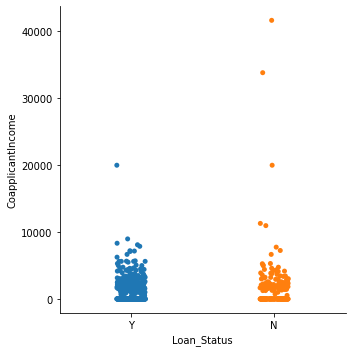

In [19]:
sns.catplot(x='Loan_Status',y='CoapplicantIncome',data=new_df)

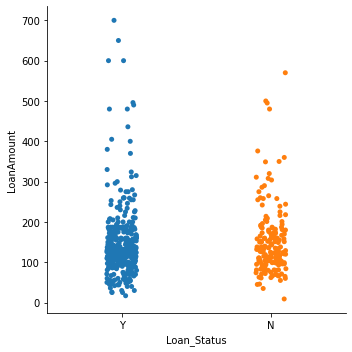

In [20]:
sns.catplot(x='Loan_Status',y='LoanAmount',data=new_df)

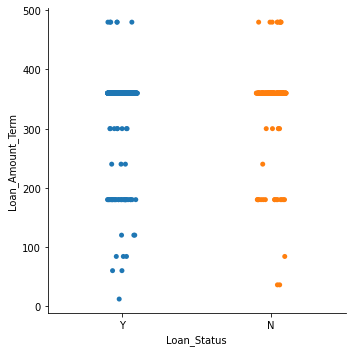

In [21]:
sns.catplot(x='Loan_Status',y='Loan_Amount_Term',data=new_df)

* Loan Status: About 2/3rd of applicants have been granted loan.

* Sex: There are more Men than Women
* Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
* Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
* Education:Majority of the population is Graduate and graduates have higher propotion of loan approval
* Employment: Majority of population is not self employed.
* Property Area: More applicants from Semi-urban and also likely to be granted loans.
* Applicant with credit history are far more likely to be accepted.
* Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).




---
**6** How is the class distribution (Y/N) in Label(Target) Variable ?


---





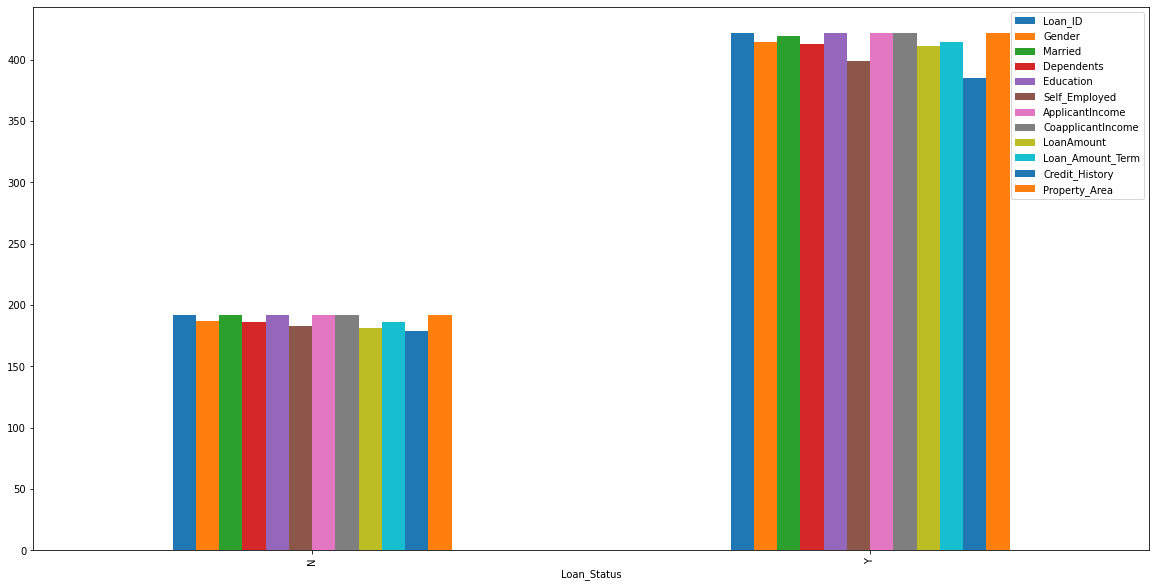

In [22]:
df.groupby('Loan_Status').count().plot.bar(figsize=[20,10])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f065f74da90>,
      dtype=object)

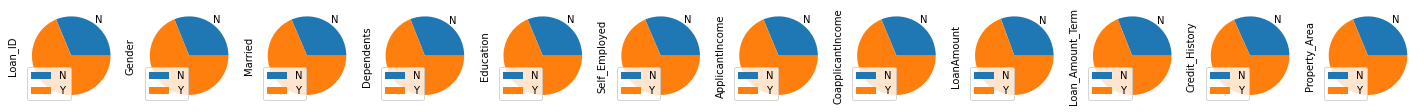

In [23]:
df.groupby('Loan_Status').count().plot.pie(figsize=[25,50],subplots=True)



---
**7** Identify the Independent Variables that have missing values.




---




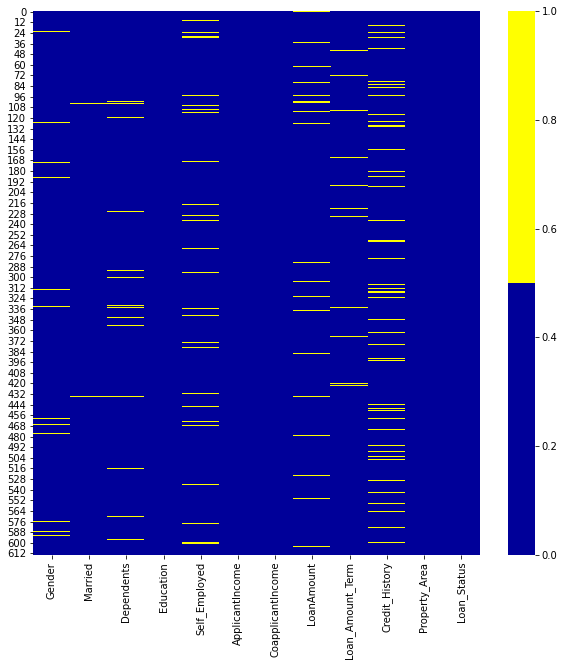

In [24]:
cols = new_df.columns
fig, ax = plt.subplots(figsize=(10,10)) 
colours = ['#000099', '#ffff00']
sns.heatmap(new_df[cols].isnull(), cmap=sns.color_palette(colours),ax=ax)

In [25]:
#by the heat map it is visible that gender, dependents, credit_history, LoanAmount, Self_Employed has many missing values 
#while married, loan_amount_term has some missing values 
#below is the Missing data percentage list
m=[]
for i in new_df.columns:
  m.append(np.mean(df[i].isnull()))
for i in range(0,len(m)):
  print(new_df.columns[i]," => ",round(m[i]*100))

Gender  =>  2.0
Married  =>  0.0
Dependents  =>  2.0
Education  =>  0.0
Self_Employed  =>  5.0
ApplicantIncome  =>  0.0
CoapplicantIncome  =>  0.0
LoanAmount  =>  4.0
Loan_Amount_Term  =>  2.0
Credit_History  =>  8.0
Property_Area  =>  0.0
Loan_Status  =>  0.0




---

**8** Handle missing values appropriately , explain the technique applied for each case


---



In [26]:
missing=[]
for i in new_df.columns:
  m=new_df[i].isnull()
  n=np.sum(m)
  if(n>=1):
    missing.append(i)
  print(i,"  <=> has missing values = ",n)


Gender   <=> has missing values =  13
Married   <=> has missing values =  3
Dependents   <=> has missing values =  15
Education   <=> has missing values =  0
Self_Employed   <=> has missing values =  32
ApplicantIncome   <=> has missing values =  0
CoapplicantIncome   <=> has missing values =  0
LoanAmount   <=> has missing values =  22
Loan_Amount_Term   <=> has missing values =  14
Credit_History   <=> has missing values =  50
Property_Area   <=> has missing values =  0
Loan_Status   <=> has missing values =  0


In [27]:
for i in missing:
  print(i," =>",new_df[i].unique())

Gender  => ['Male' 'Female' nan]
Married  => ['No' 'Yes' nan]
Dependents  => ['0' '1' '2' '3+' nan]
Self_Employed  => ['No' 'Yes' nan]
LoanAmount  => [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190

In [0]:
new_df['LoanAmount']=new_df['LoanAmount'].fillna(new_df['LoanAmount'].median())
new_df['Loan_Amount_Term']=new_df['Loan_Amount_Term'].fillna(new_df['Loan_Amount_Term'].median())
new_df['Credit_History']=new_df['Credit_History'].fillna(new_df['Credit_History'].median())
new_df['Self_Employed']=new_df['Self_Employed'].fillna(method='ffill')
new_df['Dependents']=new_df['Dependents'].fillna(method='ffill')
new_df['Married']=new_df['Married'].fillna(method='ffill')
new_df['Gender']=new_df['Gender'].fillna(method='ffill')

# since LoanAmount, Loan_Amount_Term, Credit_History were numeric so they can be updated with the median value.
# since Self_Employed, Dependents, Married, Gender are string so they can be inputed with mean or median so ffill is used 
#to fill the Null with the next occuring element.

In [29]:
for i in missing:
  m=new_df[i].isnull()
  n=np.sum(m)
  print(i,"  <=> has missing values = ",n)
# After 

Gender   <=> has missing values =  0
Married   <=> has missing values =  0
Dependents   <=> has missing values =  0
Self_Employed   <=> has missing values =  0
LoanAmount   <=> has missing values =  0
Loan_Amount_Term   <=> has missing values =  0
Credit_History   <=> has missing values =  0




---

**9** 
Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)


---



In [30]:
new_df.describe()
#only ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History are shown because describe function 
#gives the result for numeric data type only.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
print("0 to 25% \n",new_df.quantile(0)) #Q0
print("25% to 50%\n",new_df.quantile(0.25)) #Q1
print("50% to 75%\n",new_df.quantile(0.50)) #Q2
print("75% t0 100%\n",new_df.quantile(0.75)) #Q3

0 to 25% 
 ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
Loan_Amount_Term      12.0
Credit_History         0.0
Name: 0, dtype: float64
25% to 50%
 ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.25, dtype: float64
50% to 75%
 ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.5, dtype: float64
75% t0 100%
 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64




---

**10** 
Use Box-Plot chart to represent the Outliers for each Independent Variable

---



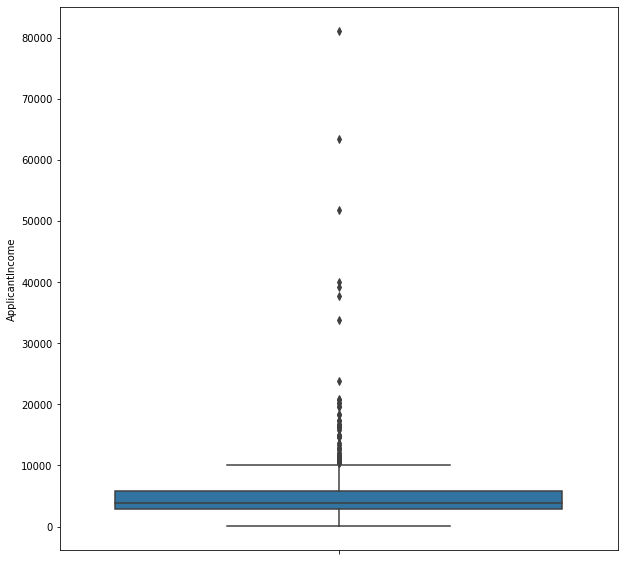

In [32]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=new_df['ApplicantIncome'])
# ApplicantIncome contains more outliners as can seen by the below box graph

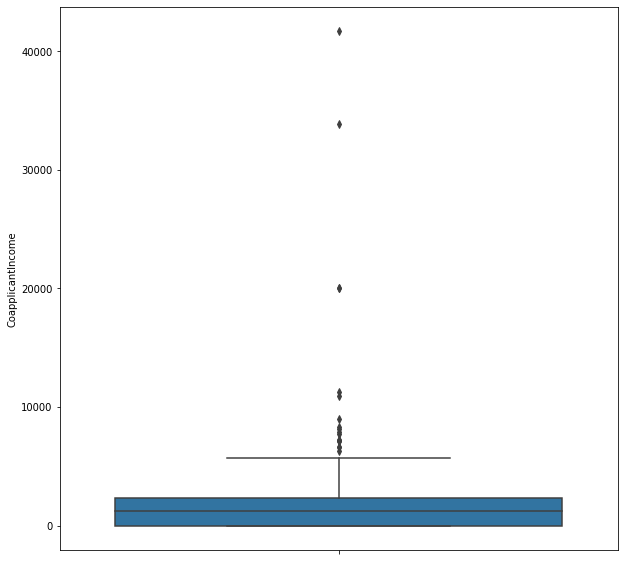

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=new_df['CoapplicantIncome'])
# CoapplicantIncome contains some outliners

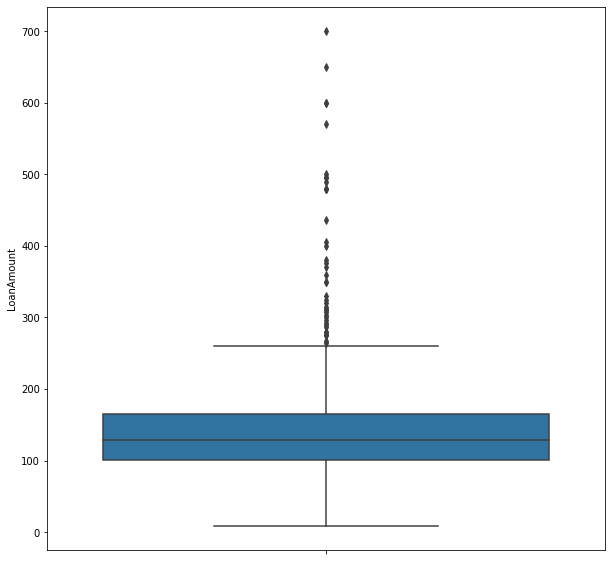

In [34]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=new_df['LoanAmount'])
# In LoanAmount there are many outliers can be seen. 

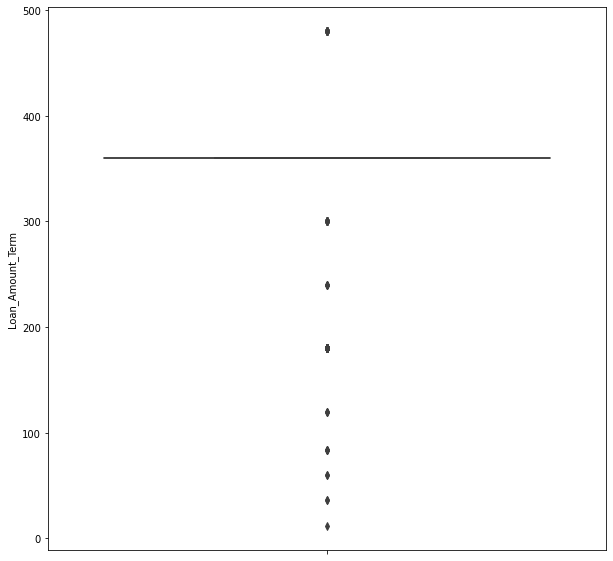

In [35]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=new_df['Loan_Amount_Term'])
#Loan_Amount_Term has one outliner 



---
**11** 
Perform treatment of these Outliers using appropriate techniqies.Explain your approach



---



In [36]:
# To remove the outliers will'll use IQR and Quartile bins
# IQR=Q3-Q1
Q1=new_df.quantile(0.1)
Q3=new_df.quantile(0.9) 
IQR=Q3-Q1
((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).sum()

ApplicantIncome      10
CoapplicantIncome     6
Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount           12
Loan_Amount_Term     71
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [0]:
new_df1=new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [38]:
print(new_df1.shape)
print(new_df.shape)

(524, 12)
(614, 12)


In [39]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
new_df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y




---

**Step-1**


Perform Label Encoding on Target Variable (Loan_Status).

---



In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [42]:
le = LabelEncoder()
enc=new_df.copy()
enc['Loan_Status'] = le.fit_transform(enc['Loan_Status'])
enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1




---
**Step-2**


---






---
**1** Perform Label Encoding on Categorical Independent Variables.


---





In [0]:
enc=new_df.copy()
for j in cate_var:
  enc['enc_'+str(j)] = le.fit_transform(enc[j])



---
**2** 
What is the shape of dataframe post Categorical Encoding ?



---





In [44]:
print("After the encoding the shape is : ",enc.shape)
enc = enc.drop(columns = cate_var)

After the encoding the shape is :  (614, 20)


In [45]:
enc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,enc_Property_Area,enc_Married,enc_Gender,enc_Self_Employed,enc_Credit_History,enc_Education,enc_Dependents,enc_Loan_Status
0,5849,0.0,128.0,360.0,2,0,1,0,1,0,0,1
1,4583,1508.0,128.0,360.0,0,1,1,0,1,0,1,0
2,3000,0.0,66.0,360.0,2,1,1,1,1,0,0,1
3,2583,2358.0,120.0,360.0,2,1,1,0,1,1,0,1
4,6000,0.0,141.0,360.0,2,0,1,0,1,0,0,1


In [46]:
print("After Dorping the columns tha shape is : ",enc.shape)

After Dorping the columns tha shape is :  (614, 12)




---
**3** Carry out Correlation analysis on this dataframe. Plot using HeatMap


---





In [47]:
cor = enc.corr()
cor.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,enc_Property_Area,enc_Married,enc_Gender,enc_Self_Employed,enc_Credit_History,enc_Education,enc_Dependents,enc_Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.009500,0.049052,0.046230,0.122728,-0.018615,-0.140760,0.115036,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.010522,0.077760,0.086991,-0.021807,0.011134,-0.062290,0.026683,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.046632,0.147108,0.097577,0.111754,-0.000607,-0.168759,0.158914,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.076120,-0.095364,-0.075813,-0.027941,-0.004705,-0.073928,-0.087210,-0.022549
enc_Property_Area,-0.009500,0.010522,-0.046632,-0.076120,1.000000,0.004415,-0.019854,-0.037106,0.001963,-0.065243,0.005131,0.032112


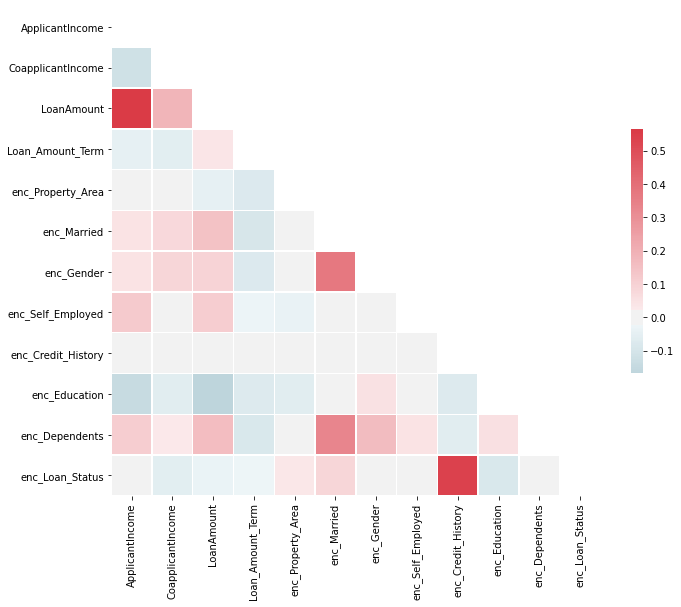

In [48]:
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(cor, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})




---

**4** 
Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)

---



In [0]:
# Loan_Status, LoanAmount,Married Have strong correlation.




---

**STEP-3**
---

**1** Perform One Hot Encoding on Categorical Independent Variables.

In [50]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=new_df.copy()
df_ohe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
print("Size of dataset before OHE : ",df_ohe.shape)
cc=cate_var
#print(cc)
for i in cc:
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  df_ohe = df_ohe.join(enc_rel)

Size of dataset before OHE :  (614, 12)




---
**2** 
What is the shape of dataframe post OHE Encoding ?


---



In [52]:
print("Size of dataset after OHE : ",df_ohe.shape)
df_ohe = df_ohe.drop(columns = cate_var)
print("Size of dataset after dropping the columns : ",df_ohe.shape)

Size of dataset after OHE :  (614, 31)
Size of dataset after dropping the columns :  (614, 23)


In [53]:
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_0,Property_Area_1,Property_Area_2,Married_0,Married_1,Gender_0,Gender_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Education_0,Education_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Loan_Status_0,Loan_Status_1
0,5849,0.0,128.0,360.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2583,2358.0,120.0,360.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.0,360.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0




---

**3** 
Carry out Correlation analysis on this dataframe. Plot using HeatMap

---



In [54]:
ohe_cor=df_ohe.corr()
ohe_cor.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_0,Property_Area_1,Property_Area_2,Married_0,Married_1,Gender_0,Gender_1,Self_Employed_0,Self_Employed_1,Credit_History_0,Credit_History_1,Education_0,Education_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Loan_Status_0,Loan_Status_1
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,0.015829,-0.014246,-0.000598,-0.049052,0.049052,-0.046230,0.046230,-0.122728,0.122728,0.018615,-0.018615,0.140760,-0.140760,-0.089291,0.040412,-0.037928,0.156687,0.004710,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.005329,-0.027044,0.022776,-0.077760,0.077760,-0.086991,0.086991,0.021807,-0.021807,-0.011134,0.011134,0.062290,-0.062290,-0.006026,-0.025532,0.002931,0.041491,0.059187,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,0.043467,-0.005804,-0.036050,-0.147108,0.147108,-0.097577,0.097577,-0.111754,0.111754,0.000607,-0.000607,0.168759,-0.168759,-0.142156,0.058578,0.016162,0.152850,0.033214,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,0.034321,0.059141,-0.094279,0.095364,-0.095364,0.075813,-0.075813,0.027941,-0.027941,0.004705,-0.004705,0.073928,-0.073928,0.100085,-0.085436,0.010409,-0.077273,0.022549,-0.022549
Property_Area_0,0.015829,0.005329,0.043467,0.034321,1.000000,-0.501646,-0.449168,0.004606,-0.004606,-0.075892,0.075892,-0.030238,0.030238,0.020906,-0.020906,-0.077520,0.077520,0.056558,-0.089038,-0.015331,0.040670,0.100694,-0.100694


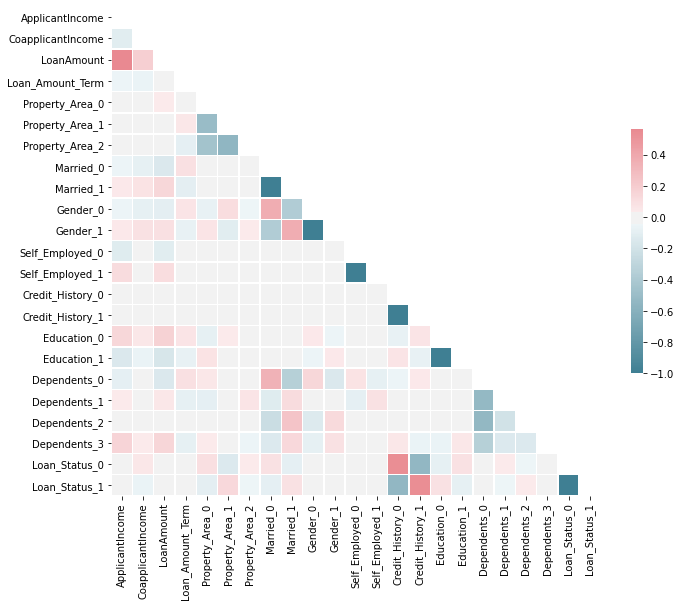

In [55]:
mask = np.zeros_like(ohe_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(ohe_cor, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})



---

**4** Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)

---



In [0]:
# Credit_History, Gender, Self_Employed, Education, Married have strong correlation 